# Table of Contents
*   Import data and libraries such as pandas, matplotlib.pyplot, numpy, and seaborn
*   Extract and read the data
*   Get information about the data
*   EDA

**Exploratory data analysis :**

- Find the age distribution of employees in IBM
- Explore attrition by age
- Explore data for Left employees
- Find out the distribution of employees by the education field
- Give a bar chart for the number of married and unmarried employees
- Build up a logistic regression model to predict which employees are likely to attrite.




**Import Library**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

 **Import Dataset**

In [2]:
data_employee_dataset = pd.read_csv("IBM Attrition Data.csv")
data_employee = data_employee_dataset.copy()
data_employee.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [3]:
data_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


The dataset consists 1470 employees

In [4]:
print(data_employee.isnull().sum())

Age                        0
Attrition                  0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvironmentSatisfaction    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
WorkLifeBalance            0
YearsAtCompany             0
dtype: int64


**Find the age distribution of employees in IBM**

In [5]:
def Age(data_employee):
    data_employee.loc[data_employee['Age'] <= 30,'Age'] = 1
    data_employee.loc[(data_employee['Age'] > 30) & (data_employee['Age'] <= 40), 'Age'] = 2
    data_employee.loc[(data_employee['Age'] > 40) & (data_employee['Age'] <= 50), 'Age'] = 3
    data_employee.loc[(data_employee['Age'] > 50) & (data_employee['Age'] <= 60), 'Age'] = 4
    return data_employee

Age(data_employee); 

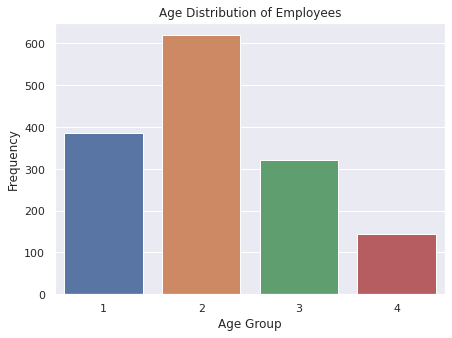

In [8]:
plt.figure(figsize=(7,5))
agedist = sns.countplot(x=data_employee['Age'])
plt.title("Age Distribution of Employees")
plt.xlabel("Age Group")
plt.ylabel("Frequency")
plt.show()

**Explore attrition by age**

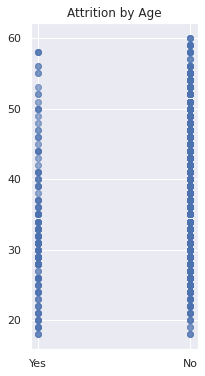

In [10]:
plt.figure(figsize=(3,6))
plt.scatter(data_employee_dataset.Attrition, data_employee_dataset.Age, alpha=.35)
plt.title("Attrition by Age")
plt.show()

**Explore data for Left employees**

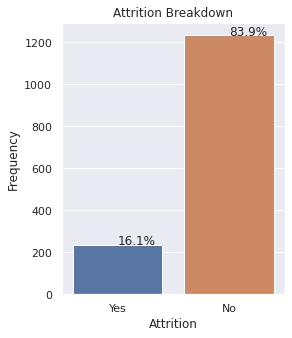

In [11]:
plt.figure(figsize=(4,5))
ax = sns.countplot(x=data_employee['Attrition'])
plt.title("Attrition Breakdown")
plt.xlabel('Attrition')
plt.ylabel('Frequency')
total = len(data_employee['Attrition'])
for p in ax.patches:
  percentage = '{:.1f}%'.format(100*p.get_height()/total)
  x = p.get_x() + p.get_width()/2
  y = p.get_y() + p.get_height() + 0.02
  ax.annotate(percentage, (x,y))
plt.show()

This year, 16.1% of the 1470 employees or around 237 employees left the company. This is a fairly high attrition rate which has a negative impact on the company.

**Find out the distribution of employees by the education field**

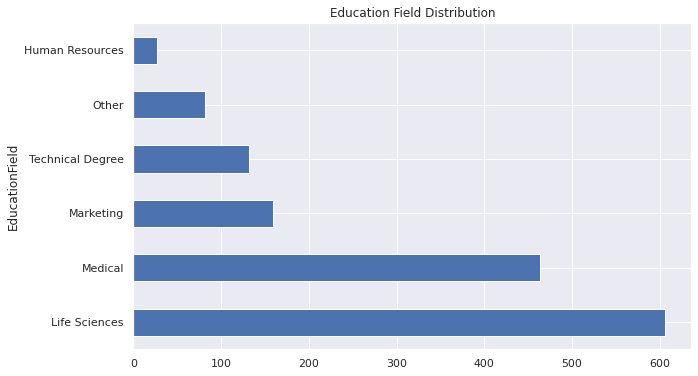

In [12]:
data_employee.value_counts("EducationField").plot(kind='barh',figsize=(10,6),title="Education Field Distribution")
plt.show()

**Give a bar chart for the number of married and unmarried employees**

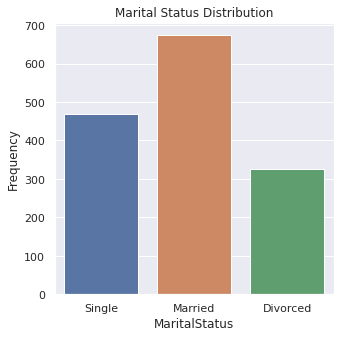

In [13]:
plt.figure(figsize=(5,5))
maritalstat = sns.countplot(x=data_employee['MaritalStatus'])
plt.title("Marital Status Distribution")
plt.ylabel("Frequency")
plt.show()

### **Convert Data Categorical to Numerical**

In [14]:
def MonthlyIncome(data_employee):
    data_employee.loc[data_employee['MonthlyIncome'] <= 1500,'MonthlyIncome'] = 1
    data_employee.loc[(data_employee['MonthlyIncome'] > 1500) & (data_employee['MonthlyIncome'] <= 3000), 'MonthlyIncome'] = 2
    data_employee.loc[(data_employee['MonthlyIncome'] > 3000) & (data_employee['MonthlyIncome'] <= 4500), 'MonthlyIncome'] = 3
    data_employee.loc[(data_employee['MonthlyIncome'] > 4500) & (data_employee['MonthlyIncome'] <= 6000), 'MonthlyIncome'] = 4
    data_employee.loc[(data_employee['MonthlyIncome'] > 6000) & (data_employee['MonthlyIncome'] <= 7500), 'MonthlyIncome'] = 5
    data_employee.loc[data_employee['MonthlyIncome'] > 7500, 'MonthlyIncome'] = 6
    return data_employee

MonthlyIncome(data_employee); 

In [15]:
def DistanceFromHome(data_employee):
    data_employee.loc[data_employee['DistanceFromHome'] <= 5,'DistanceFromHome'] = 1
    data_employee.loc[(data_employee['DistanceFromHome'] > 5) & (data_employee['DistanceFromHome'] <= 10), 'DistanceFromHome'] = 2
    data_employee.loc[(data_employee['DistanceFromHome'] > 10) & (data_employee['DistanceFromHome'] <= 15), 'DistanceFromHome'] = 3
    data_employee.loc[(data_employee['DistanceFromHome'] > 15) & (data_employee['DistanceFromHome'] <= 20), 'DistanceFromHome'] = 4
    data_employee.loc[(data_employee['DistanceFromHome'] > 20) & (data_employee['DistanceFromHome'] <= 25), 'DistanceFromHome'] = 5
    data_employee.loc[(data_employee['DistanceFromHome'] > 25) & (data_employee['DistanceFromHome'] <= 30), 'DistanceFromHome'] = 6
    return data_employee

DistanceFromHome(data_employee); 

In [16]:
def YearsAtCompany(data_employee):
    data_employee.loc[data_employee['YearsAtCompany'] <= 10,'YearsAtCompany'] = 1
    data_employee.loc[(data_employee['YearsAtCompany'] > 10) & (data_employee['YearsAtCompany'] <= 20), 'YearsAtCompany'] = 2
    data_employee.loc[(data_employee['YearsAtCompany'] > 20) & (data_employee['YearsAtCompany'] <= 30), 'YearsAtCompany'] = 3
    data_employee.loc[data_employee['YearsAtCompany'] > 30, 'YearsAtCompany'] = 4
    return data_employee

YearsAtCompany(data_employee); 

In [17]:
data_employee['Attrition'].replace('Yes',1, inplace=True)
data_employee['Attrition'].replace('No',0, inplace=True)
data_employee['EducationField'].replace('Life Sciences',1, inplace=True)
data_employee['EducationField'].replace('Medical',2, inplace=True)
data_employee['EducationField'].replace('Marketing', 3, inplace=True)
data_employee['EducationField'].replace('Other',4, inplace=True)
data_employee['EducationField'].replace('Technical Degree',5, inplace=True)
data_employee['EducationField'].replace('Human Resources', 6, inplace=True)
data_employee['Department'].replace('Research & Development',1, inplace=True)
data_employee['Department'].replace('Sales',2, inplace=True)
data_employee['Department'].replace('Human Resources', 3, inplace=True)
data_employee['MaritalStatus'].replace('Married',1, inplace=True)
data_employee['MaritalStatus'].replace('Single',2, inplace=True)
data_employee['MaritalStatus'].replace('Divorced',3, inplace=True)
data_employee.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,3,1,2,1,2,1,2,4,2,4,8,1,1
1,3,0,1,2,1,1,3,2,1,4,1,3,1
2,2,1,1,1,2,4,4,3,2,2,6,3,1
3,2,0,1,1,4,1,4,3,1,2,1,3,1
4,1,0,1,1,1,2,1,2,1,3,9,3,1


In [18]:
data_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      1470 non-null   int64
 1   Attrition                1470 non-null   int64
 2   Department               1470 non-null   int64
 3   DistanceFromHome         1470 non-null   int64
 4   Education                1470 non-null   int64
 5   EducationField           1470 non-null   int64
 6   EnvironmentSatisfaction  1470 non-null   int64
 7   JobSatisfaction          1470 non-null   int64
 8   MaritalStatus            1470 non-null   int64
 9   MonthlyIncome            1470 non-null   int64
 10  NumCompaniesWorked       1470 non-null   int64
 11  WorkLifeBalance          1470 non-null   int64
 12  YearsAtCompany           1470 non-null   int64
dtypes: int64(13)
memory usage: 149.4 KB


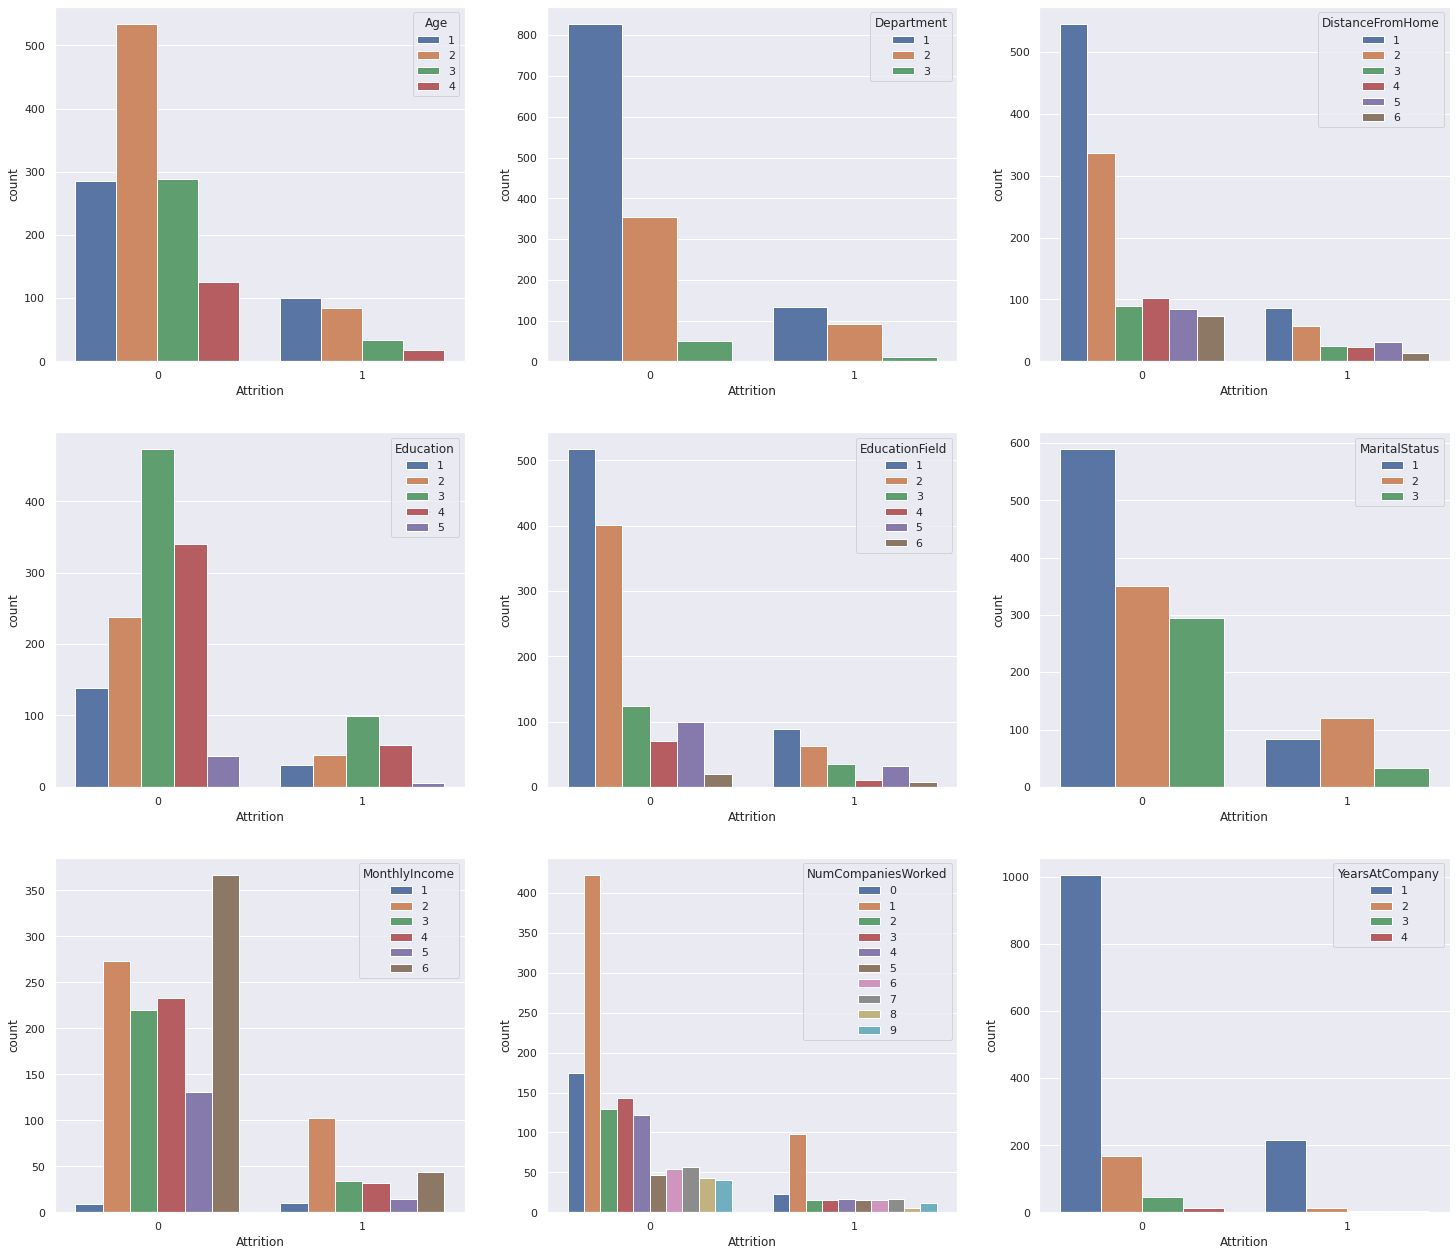

In [20]:
plt.figure(figsize = (25,30))
y = (["","Age", "Department", "DistanceFromHome", "Education", "EducationField", "MaritalStatus", "MonthlyIncome",
      "NumCompaniesWorked", "YearsAtCompany", "EnvironmentSatisfaction", "JobSatisfaction", "WorkLifeBalance"])
for i in range(1,10):
    plt.subplot(4,3,i)
    sns.countplot(x = "Attrition", data = data_employee, hue=y[i]) #hue : names of variables in data or vector data

plt.show()

Some of the things I highlight here include :
- The highest number of employees are in the age group of 30-40 years, but the employees who leave the company the most are in the age group below 30 years.
- The largest number of employees at IBM is in the research and development department with educational background bachelor degree of life science
- Employees at IBM are dominated by workers who have experience working in previous companies with NumCompaniesWorked=1.


### **Correlation**

In [21]:
corr_matrix = round(data_employee.corr(), 2)
corr_matrix

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
Age,1.00,-0.13,-0.00,-0.00,0.21,-0.04,0.01,0.00,-0.04,0.41,0.27,-0.01,0.26
Attrition,-0.13,1.00,0.08,0.07,-0.03,0.08,-0.10,-0.10,0.01,-0.18,0.04,-0.06,-0.07
Department,-0.00,0.08,1.00,0.00,0.02,0.24,-0.03,-0.01,-0.03,0.13,-0.01,0.08,0.03
DistanceFromHome,-0.00,0.07,0.00,1.00,0.02,0.00,-0.02,-0.01,-0.03,0.02,-0.03,-0.03,-0.02
Education,0.21,-0.03,0.02,0.02,1.00,0.02,-0.03,-0.01,-0.00,0.12,0.13,0.01,0.05
EducationField,-0.04,0.08,0.24,0.00,0.02,1.00,0.05,-0.04,-0.02,-0.01,-0.00,0.04,-0.02
EnvironmentSatisfaction,0.01,-0.10,-0.03,-0.02,-0.03,0.05,1.00,-0.01,0.02,-0.01,0.01,0.03,-0.00
JobSatisfaction,0.00,-0.10,-0.01,-0.01,-0.01,-0.04,-0.01,1.00,-0.00,0.00,-0.06,-0.02,-0.01
MaritalStatus,-0.04,0.01,-0.03,-0.03,-0.00,-0.02,0.02,-0.00,1.00,-0.02,0.03,-0.00,0.00
MonthlyIncome,0.41,-0.18,0.13,0.02,0.12,-0.01,-0.01,0.00,-0.02,1.00,0.16,0.03,0.37


From the correlation plot above, it is found that there are no features that directly have a high enough correlation value to the attrition rate.
The percentage of monthly income has the highest correlation with the age of the employee (0.41 out of a scale of 1) and the years at company (0.37). However, I do not highlight this because the correlation values of them below 0.5 which is not a big deal.

### **Split Data**



In [22]:
y = data_employee['Attrition'] #dependent variabel
x = data_employee.drop('Attrition', axis = 1) #independent variabel

In [23]:
import sklearn
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

The dataset is divided into two, namely training data and testing data with a ratio of 80:20

In [24]:
print(x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)

(294, 12)
(294,)
(1176, 12)
(1176,)


In [25]:
x

,Age,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,3,2,1,2,1,2,4,2,4,8,1,1
1,3,1,2,1,1,3,2,1,4,1,3,1
2,2,1,1,2,4,4,3,2,2,6,3,1
3,2,1,1,4,1,4,3,1,2,1,3,1
4,1,1,1,1,2,1,2,1,3,9,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2,1,5,2,2,3,4,1,2,4,3,1
1466,2,1,2,1,2,4,1,1,6,4,3,1
1467,1,1,1,3,1,2,2,1,5,1,3,1
1468,3,2,1,3,2,4,2,1,4,2,2,1


### **Build The Model Using Linear Logistic Regression**

After analyzing the dataset, machine learning modeling will be carried out on the dataset. This model is later expected to help managers predict the probability of the attrition rate of each employee

In [26]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score
lr.score(x_train,y_train)
y_pred = lr.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8299319727891157
[[243   2]
 [ 48   1]]


The accuration level using Linear Logistic Regression model is **82,99%** which is not too high for the accuracy value

In [28]:
prob = lr.predict_proba(x_test)
x_test['At Rate'] = prob[:,1]

In [29]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
x_test.sort_values(by='At Rate', ascending = False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


,Age,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany,At Rate
748,1,2,6,2,2,2,1,2,4,8,3,1,0.601935
1411,1,3,1,3,6,3,2,1,2,4,3,1,0.601227
717,1,1,4,4,5,3,2,1,2,9,3,1,0.594828
1039,2,3,2,4,5,1,3,1,2,1,3,1,0.486848
1137,1,1,6,2,4,2,3,1,2,1,2,1,0.475962
54,1,2,5,3,3,3,4,1,3,7,2,1,0.471835
482,2,2,3,4,2,2,1,3,3,2,1,1,0.459894
1114,3,1,3,4,4,3,1,1,2,8,2,1,0.454547
4,1,1,1,1,2,1,2,1,3,9,3,1,0.442774
540,1,1,1,2,1,1,2,2,2,7,3,1,0.429409


### **Conclusion**
- The highest attrition rate occurs in employees with the category of young age (under 30 years), single or unmarried status, and has worked once in another company before. Therefore, groups of employees who fall into this category can be given special treatment, such as providing a more detailed explanation of the job desk and company culture during recruitment to prospective employees who already have work experience.
- There is no particular feature that has a high enough direct correlation with the attrition rate. This is probably because the attrition decisions of each individual are very diverse, so that the handling must be viewed personally one by one.
- Machine learning modeling is performed for the dataset. This modeling is expected to produce attrition probability values for each individual based on the combination of existing features. The modeling results are expected to help managers determine policies in their efforts to reduce the company's attrition rate.